## SVM of LOL Winner Prediction

Getting the Environment Ready

In this section, I'll vectorize the texts using Sklearn, preprocess the texts using nltk, then create a model using Sklearn.

I'll also make use of numerous libraries.

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Binarizer, KBinsDiscretizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import time
import re
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from textblob import TextBlob

In [202]:
df1 = pd.read_csv("../HW4/TweetsDF_clean.csv")
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
#Removing the html strips

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on text column
df1['text']=df1['text'].apply(denoise_text)
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on text column
df1['text']=df1['text'].apply(remove_special_characters)
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on text column
df1['text']=df1['text'].apply(simple_stemmer)
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on text column
df1['text']=df1['text'].apply(remove_stopwords)
df1['label'] = ''
for i,x in df1.text.iteritems():
    label = TextBlob(x)
    df1['label'][i] = label.sentiment.polarity
    print("Index: ", i ,  "label" , label.sentiment.polarity)
    def polarity_to_label(x):
        if(x >= -1 and x < 0):
            return "negative"
        if(x == 0):
            return "neutral"
        if(x > 0 and x <= 1):
            return "positive"
df1.label = df1.label.apply(polarity_to_label)

/Users/lutianshu/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/lutianshu/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/bs4/__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


{'ours', 'some', 'shan', 'you', 'their', 'he', 'so', 'very', 'been', 'against', 's', "couldn't", "haven't", "you're", 'my', "it's", 'or', "you've", 'd', 'over', 'and', 'more', 'themselves', 'ourselves', 'don', 'nor', 'was', 'whom', 'hadn', 'out', "that'll", 'her', 'what', 'our', 'up', "won't", 'further', "should've", 'while', 'were', "doesn't", 'being', 'until', 'from', 'we', 'is', 're', 'these', 'few', 'its', 'doing', 'mightn', 'then', 'won', 'should', 'all', 'by', 'down', 'as', 'when', "hasn't", 'are', "didn't", 'how', 'theirs', 'his', 'me', 'own', 'in', 'your', 'they', 'be', 'them', 'that', 'him', 'o', 'did', 'it', 'here', 'the', 'couldn', 'both', 'to', 'not', 'but', 'only', 'has', "you'll", 'on', 'y', "needn't", 'do', 'before', 'same', "wouldn't", 'those', 'why', 'hasn', 'if', "hadn't", 'each', 'below', 'too', 'during', "weren't", 'wouldn', 'with', "wasn't", 'other', 'she', 'there', 'isn', 'needn', 'haven', 'shouldn', "mightn't", 'any', "aren't", 'this', 'such', 'about', 'll', 'hav

/var/folders/x0/hs0ftcf97kvfw04xwdy3zf_00000gn/T/ipykernel_13967/767244047.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'][i] = label.sentiment.polarity


Index:  0 label 0.0
Index:  1 label 0.14285714285714285
Index:  2 label 0.0
Index:  3 label 0.0
Index:  4 label 0.0
Index:  5 label 0.6
Index:  6 label 0.0
Index:  7 label 0.0
Index:  8 label -0.4
Index:  9 label 0.0
Index:  10 label -0.04999999999999999
Index:  11 label 0.0
Index:  12 label 0.0
Index:  13 label -0.056249999999999994
Index:  14 label 0.0
Index:  15 label 0.0
Index:  16 label 0.0
Index:  17 label 0.0
Index:  18 label 0.0
Index:  19 label 0.0
Index:  20 label 0.0
Index:  21 label 0.0
Index:  22 label -0.5
Index:  23 label 0.0
Index:  24 label 0.0
Index:  25 label -0.4
Index:  26 label 0.5
Index:  27 label 0.0
Index:  28 label 0.0
Index:  29 label -0.4
Index:  30 label -0.4
Index:  31 label -0.4
Index:  32 label 0.0
Index:  33 label 0.0
Index:  34 label 0.13636363636363635
Index:  35 label 0.0
Index:  36 label 0.0
Index:  37 label 0.0
Index:  38 label 0.3333333333333333
Index:  39 label 0.0
Index:  40 label 0.0
Index:  41 label 1.0
Index:  42 label 0.0
Index:  43 label 0.

In [203]:
train_set = df1.iloc[:8000,:]
test_set = df1.iloc[8000:,:]

train_set.head()

,text,favorited,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted,label
0,aluno nome rhaast idad 27 ano universo leagu l...,False,0,2022-09-27 02:58:10,True,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",Instituto_Grey,0,False,False,neutral
1,rt jacksonstanton6 juliaknowsit ah see bought ...,False,0,2022-09-27 02:58:08,False,1.574594e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",trolleybacon,1,True,False,positive
2,rt cblol hello crocjg tem um pedido faa l imed...,False,0,2022-09-27 02:58:03,False,1.574594e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SonHeathcliff,91,True,False,neutral
3,leagu legend,False,0,2022-09-27 02:57:42,False,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",Instituto_Grey,0,False,False,neutral
4,rt xricoadk mejorando el leagu legend httpstco...,False,0,2022-09-27 02:57:18,False,1.574594e+18,"<a href=""http://twitter.com/download/android"" ...",im_raqhm,99,True,False,neutral


Data Summary

We shall examine the data in this part. And we'll utilize NLTK's frequency distributions to do this.

Let's first remove any unnecessary features.

In [204]:
unrelevant_features = ["favorited","favoriteCount","created","truncated","id","statusSource","screenName","retweetCount","isRetweet","retweeted"]

train_set.drop(unrelevant_features,inplace=True,axis=1)
test_set.drop(unrelevant_features,inplace=True,axis=1)
train_set.head()

/var/folders/x0/hs0ftcf97kvfw04xwdy3zf_00000gn/T/ipykernel_13967/1570615578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(unrelevant_features,inplace=True,axis=1)
/var/folders/x0/hs0ftcf97kvfw04xwdy3zf_00000gn/T/ipykernel_13967/1570615578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(unrelevant_features,inplace=True,axis=1)


,text,label
0,aluno nome rhaast idad 27 ano universo leagu l...,neutral
1,rt jacksonstanton6 juliaknowsit ah see bought ...,positive
2,rt cblol hello crocjg tem um pedido faa l imed...,neutral
3,leagu legend,neutral
4,rt xricoadk mejorando el leagu legend httpstco...,neutral


Let's categorize sentences into three groups: Positive, Neutral, and Negative.

In [205]:
train_set["label"].value_counts()

neutral     4069
negative    2446
positive    1485
Name: label, dtype: int64

In [206]:
positives = train_set[(train_set["label"] == "positive")]
positives_test = test_set[(test_set["label"] == "positive")]
print(positives["label"].value_counts())
positives.head()

positive    1485
Name: label, dtype: int64


,text,label
1,rt jacksonstanton6 juliaknowsit ah see bought ...,positive
5,rt xhe_1992 crystal rose akalileagu legend wil...,positive
26,rt esportschart top team leagueoflegend summer...,positive
34,rt ptittwitchfr live depui moin de 1h httpstco...,positive
38,lilico_error404 geng4r_1 vitorventura_ china t...,positive


In [207]:
negatives = train_set[(train_set["label"] == "negative")]
negatives_test = test_set[(test_set["label"] == "negative")]
print(negatives["label"].value_counts())
negatives.head()

negative    2446
Name: label, dtype: int64


,text,label
8,rt mistahexx hoe leagu legend clan co playin game,negative
10,rt rsspitt much drama chess leagu legend scene...,negative
13,rt lilnasx thank u much everyon play leagu leg...,negative
22,2000 pc cant run leagu legend wtf,negative
25,world 2 day 17 hour els excit curiou get ani b...,negative


In [208]:
neutrals = train_set[train_set["label"] == "neutral"]
neutrals_test = test_set[test_set["label"] == "neutral"]
print(neutrals["label"].value_counts())
neutrals.head()

neutral    4069
Name: label, dtype: int64


,text,label
0,aluno nome rhaast idad 27 ano universo leagu l...,neutral
2,rt cblol hello crocjg tem um pedido faa l imed...,neutral
3,leagu legend,neutral
4,rt xricoadk mejorando el leagu legend httpstco...,neutral
6,rt amiami_english releas leagu legend kda ahri...,neutral


Let's now translate labels into numbers. I'll label the negatives as 0, the neutrals as 1, and the positives as 2.

In [209]:
import warnings as wrn
wrn.filterwarnings('ignore')

negatives["label"] = 0 
negatives_test["label"] = 0

positives["label"] = 2
positives_test["label"] = 2

neutrals["label"] = 1
neutrals_test["label"] = 1

negatives.head()

,text,label
8,rt mistahexx hoe leagu legend clan co playin game,0
10,rt rsspitt much drama chess leagu legend scene...,0
13,rt lilnasx thank u much everyon play leagu leg...,0
22,2000 pc cant run leagu legend wtf,0
25,world 2 day 17 hour els excit curiou get ani b...,0


I will now combine train and test; after processing, I will separate them.

In [210]:
data = pd.concat([positives,
                  positives_test,
                  neutrals,
                  neutrals_test,
                  negatives,
                  negatives_test
                 ],axis=0)

data.reset_index(inplace=True)

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   10000 non-null  int64 
 1   text    10000 non-null  object
 2   label   10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [212]:
data.head()

,index,text,label
0,1,rt jacksonstanton6 juliaknowsit ah see bought ...,2
1,5,rt xhe_1992 crystal rose akalileagu legend wil...,2
2,26,rt esportschart top team leagueoflegend summer...,2
3,34,rt ptittwitchfr live depui moin de 1h httpstco...,2
4,38,lilico_error404 geng4r_1 vitorventura_ china t...,2


Now that everything is prepared, we can begin analyzing data by looking at random sentences.

In [213]:
import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["text"][random_ind]),end="\nLabel: ")
    print(str(data["label"][random_ind]),end="\n\n")

jeden z graczi lola stworzi koncept project vex czi bohaterka pasuj tej serii skrek leagueoflegend httpstcobcstkvfqjv
Label: 1

rt toadamarillo partir de la 0000 entramo en modo world desayunamo comemo cenamo dormimo con leagu legend la mejor p
Label: 1

lil na x star walkinleagu legend world httpstcoi4hk6zokhr youtub
Label: 1

rt bigclangg zusammen mit volvicd verlosen wir ein big leagu legend jersey und einen monatsvorrat volvic tee teilnahm
Label: 1

rt keymiftah79 france24 riot game
Label: 0

rt jumaralohexcor crystal rose vi concept art leagu legend wild rift bula httpstco69ttf4acj httpstco1tpaqcsdon
Label: 2

alguma indicao de mmorpg vou testar algun essa semana para fugir leagu legend foda achar um httpstco38bn9vtii
Label: 1

rt nflyingoffici nfli warrior enemi rise popstarsleagu legend ost medley behind photo nfli lea
Label: 0

rt gamerauntsia leagu legend jokalariok adi bergarakoudalak wolframencount 2022 lol txapelketa aurkeztu du izen ematea
Label: 2



Moreover, let's examine the frequency distributions.

In [215]:
positiveFD = nltk.FreqDist(word for text in data[data["label"] == 2]["text"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in data[data["label"] == 0]["text"] for word in text.lower().split())
neutralDF = nltk.FreqDist(word  for text in data[data["label"] == 1]["text"] for word in text.lower().split())

We may now look at the most popular word plots.

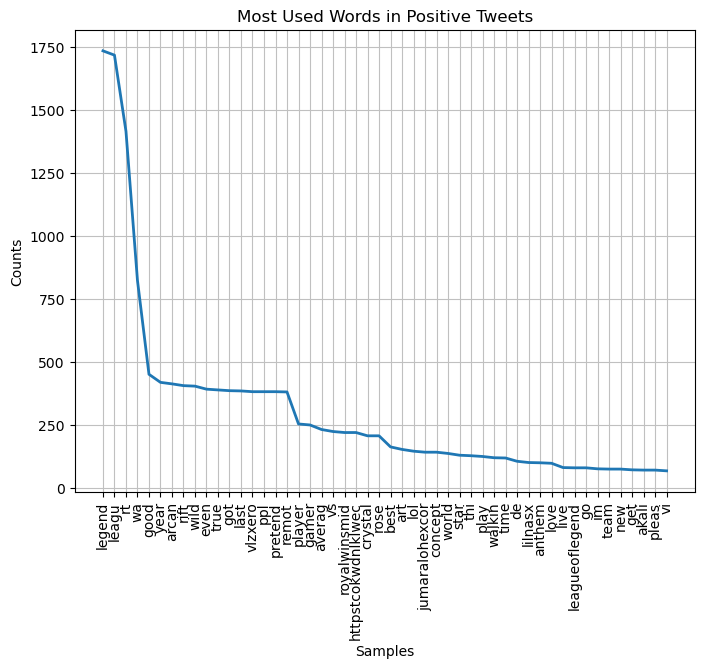

In [216]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Tweets")
positiveFD.plot(50)
plt.show()

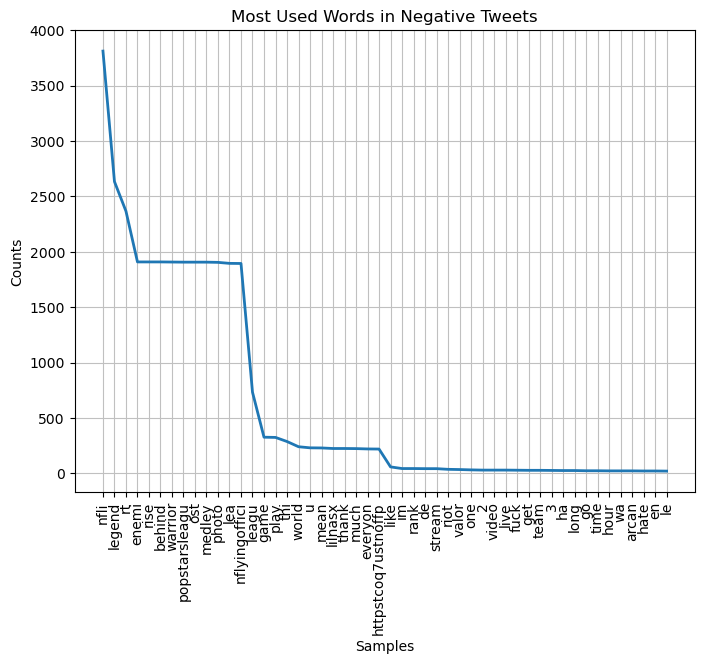

In [217]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Tweets")
negativeFD.plot(50)
plt.show()

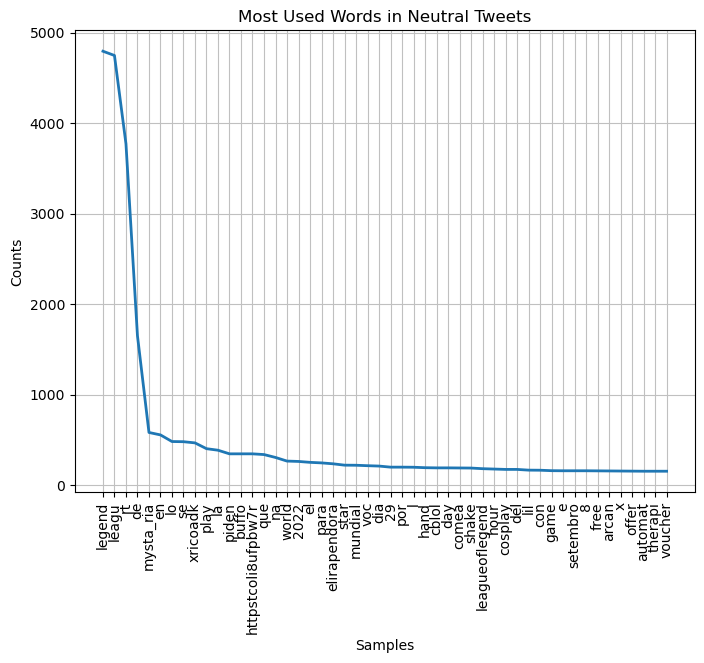

In [218]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Tweets")
neutralDF.plot(50)
plt.show()

We refer to most of the words as stopwords since they have no particular meaning, but there are few distinguishing words.

In [220]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(df1["text"])

We may divide our set into train and test now that everything is prepared.

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["label"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 10000)
(2500, 10000)
(7500,)
(2500,)


Modeling using Support Vector Machine Classifier

The pieces are in place, and we can now fit our classifier.

In [222]:
from sklearn.svm import SVC
start_time = time.time()

model = SVC()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 2.49 seconds


In [223]:
predictions = model.predict(x_test)

Let's now examine the matrix of correctness and confusion.

In [224]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 64.32%


We are 64.32% accurate. Not bad, however I suppose deep learning might help us create a better model.

### Methods:

Support Vector Machines, sometimes known as SVMs, are supervised machine learning algorithms that may be used to regression and classification tasks. In this section, I'll construct an SVM classifier to categorize a LOL winner. For this step, I utilized a previously cleaned dataset.

Based on various criteria input in the dataset discovered, I will attempt to develop a prediction model that can determine if team 1 will win.

For the time being, we have only filtered out the information that wouldn't be helpful for my initial model. In fact, I'm not interested in learning who the champion was or even the bans that were imposed for the first editions.

The index was then improved for easier reading. The past success of the teams, information on the characters, match aspects, and many other factors may all be used to predict a winner.

In [138]:
df = pd.read_csv("../HW4/df_games_clean.csv")
df = df.drop(["creationTime", "seasonId"], axis=1)
df = df.drop(df.columns[8: df.shape[1]], axis=1)
df.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
0,32,1,2,1,1,1,1,2
1,31,1,1,1,1,0,1,1
2,25,1,2,1,1,1,2,0
3,29,1,1,1,1,1,1,0
4,35,1,2,1,1,1,1,0


In [139]:
# Modify our index.
df["Index"] = range(0, df.shape[0])
df = df.set_index("Index")
df.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
Index,,,,,,,,
0,32,1,2,1,1,1,1,2
1,31,1,1,1,1,0,1,1
2,25,1,2,1,1,1,2,0
3,29,1,1,1,1,1,1,0
4,35,1,2,1,1,1,1,0


In [140]:
# Change values ​​1 and 2 to 0 and 1
df["winner"] = df["winner"].replace(1, 0)
df["winner"] = df["winner"].replace(2, 1)
df["winner"].unique()

array([0, 1])

In [141]:
df.shape

(48675, 8)

### Class Distribution:

Content & form analysis

In [142]:
# Count the number of times team 1 has won.
df["winner"].value_counts(normalize=True)

0    0.504735
1    0.495265
Name: winner, dtype: float64

In [172]:
# Choose our target and our data
X = df.drop(["winner"], axis=1)
y = df["winner"]

Check the relationships between target and the different variables

In [173]:
# Create subsets when team 1 wins and when team 1 loses
team1_win = df[df["winner"] == 0]
team1_lose = df[df["winner"] == 1]

<Figure size 640x480 with 0 Axes>

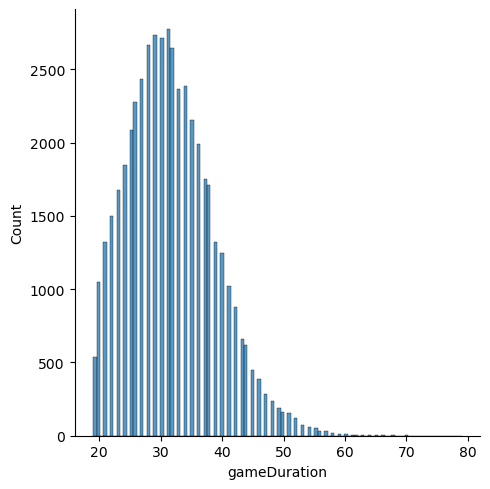

<Figure size 640x480 with 0 Axes>

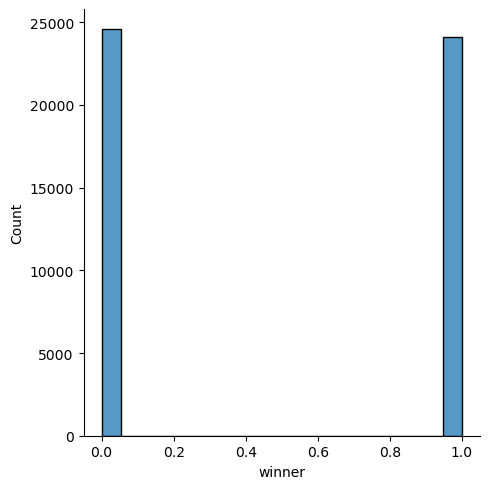

<Figure size 640x480 with 0 Axes>

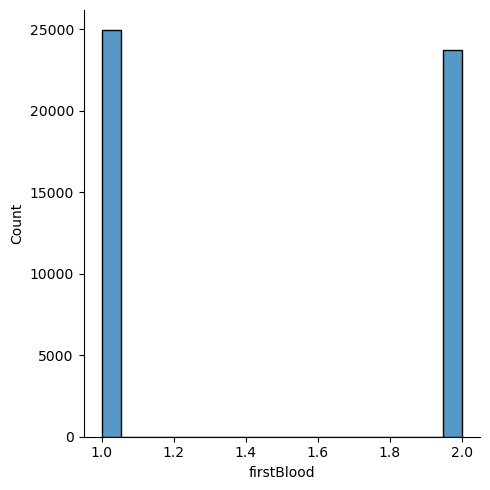

<Figure size 640x480 with 0 Axes>

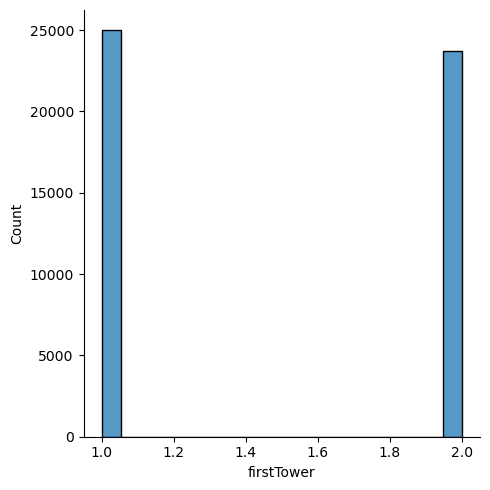

<Figure size 640x480 with 0 Axes>

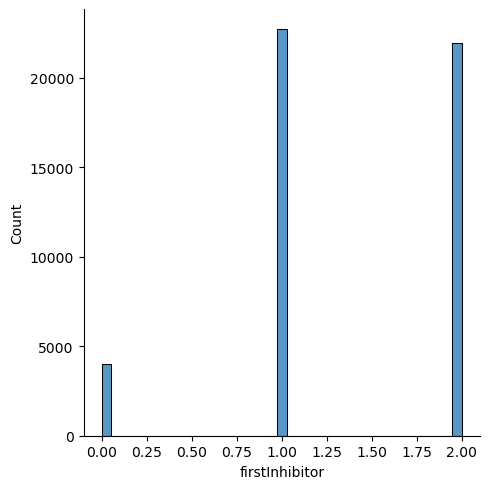

<Figure size 640x480 with 0 Axes>

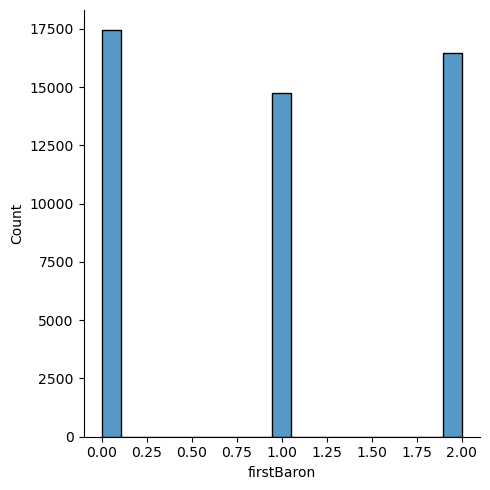

<Figure size 640x480 with 0 Axes>

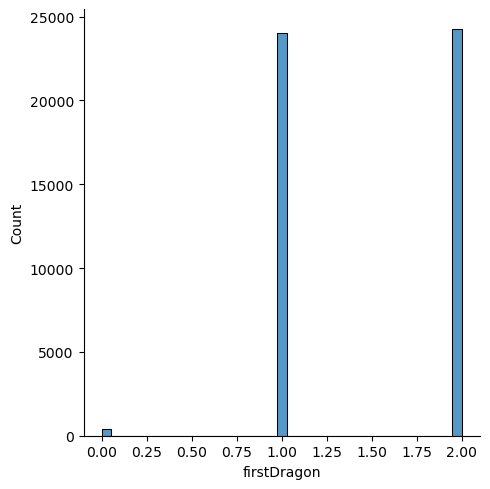

<Figure size 640x480 with 0 Axes>

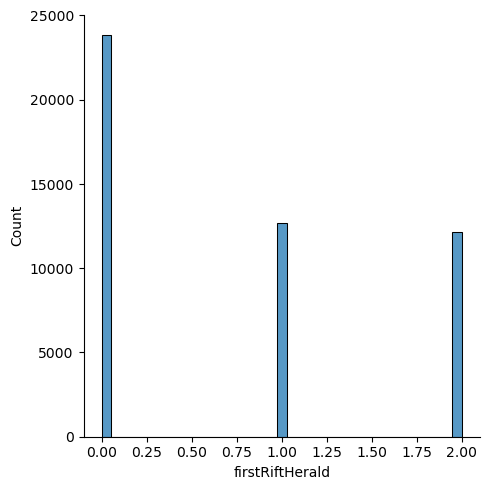

In [145]:
# Plot column histograms
for col in df.select_dtypes("int"):
    plt.figure()
    sns.displot(df[col])

I want to make the graph more attractive since I'm interested in the "GameDuration" variable. maybe even add up the values. However, after doing my little experiments, I recognized that my results were lacking due to the gameDuration numbers, which were much too atypical. I've been advised that grouping the gameDuration data into smaller units made it more intriguing. Later, I'll determine whether they are helpful.

In [146]:
# Creation of small groups to share gameDuration by index
df["1st_group_gd"] = df.index < 10000
df["2nd_group_gd"] = (df.index >= 10000) & (df.index < 20000)
df["3rd_group_gd"] = (df.index >= 20000) & (df.index < 30000)
df["4th_group_gd"] = (df.index >= 30000) & (df.index < 40000)
df["5th_group_gd"] = (df.index >= 40000) & (df.index < df.shape[0])
# Replace true & false by 1 & 0 -> Method 1
df = df.applymap(lambda x: 1 if x == True else x)
df = df.applymap(lambda x: 0 if x == False else x)

df.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,1st_group_gd,2nd_group_gd,3rd_group_gd,4th_group_gd,5th_group_gd
Index,,,,,,,,,,,,,
0,32,0,2,1,1,1,1,2,1,0,0,0,0
1,31,0,1,1,1,0,1,1,1,0,0,0,0
2,25,0,2,1,1,1,2,0,1,0,0,0,0
3,29,0,1,1,1,1,1,0,1,0,0,0,0
4,35,0,2,1,1,1,1,0,1,0,0,0,0


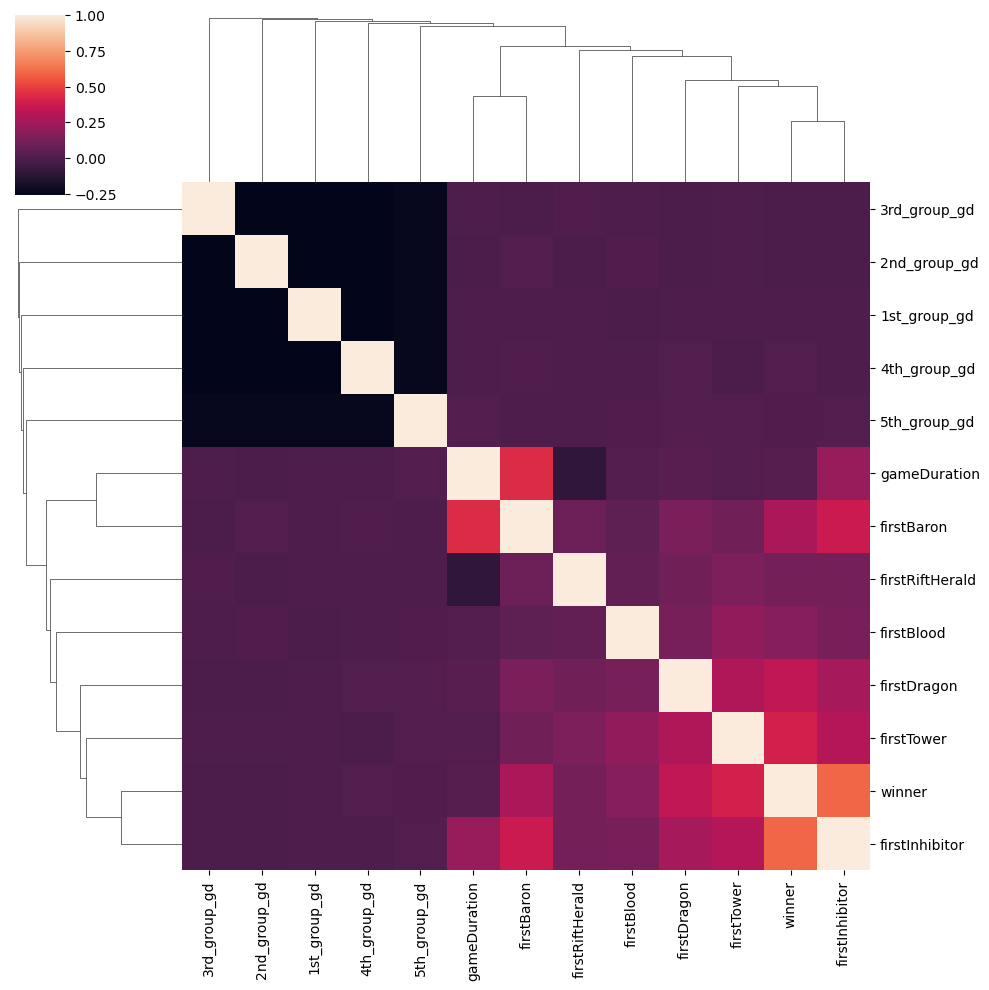

In [147]:
# Show correlated variables.
sns.clustermap(df.corr())

In [148]:
# Check if there is a correlation with %
df.corr()["winner"].sort_values()

3rd_group_gd      -0.007490
2nd_group_gd      -0.006778
1st_group_gd       0.000951
5th_group_gd       0.005001
4th_group_gd       0.008579
gameDuration       0.022433
firstRiftHerald    0.117758
firstBlood         0.167323
firstBaron         0.275292
firstDragon        0.337877
firstTower         0.399353
firstInhibitor     0.596148
winner             1.000000
Name: winner, dtype: float64

From my analysis, I therefore notice several things. First, we have about 50% wins for both teams. Ratio that we will have to keep when we create our sets. Then, the variables are not strongly correlated apart from the "first inhibitor" objective correlated at 59.6%. What surprises me is the gameDuration which is not greatly correlated but I think it is because of the enormous diversity of values ​​which does not allow a good correlation to be made.

### Baseline Model for Comparision:

Preprocessing

Trainset / Cleaning / Encoding

In [149]:
# Create sets
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)
# Check the number in the sets
trainset["winner"].value_counts()

0    19682
1    19258
Name: winner, dtype: int64

In [150]:
# The proportions are well kept
testset["winner"].value_counts()

0    4886
1    4849
Name: winner, dtype: int64

Automating

In [151]:
# Another method for true/false in 1/0 -> Encoding
def encoding(df):
    return df

In [152]:
#Later, if we want to delete some columns to test the efficiency of our model, we will do it here
def imputation(df):
    df = df.drop(df.columns[8: df.shape[1]], axis=1)
    df = df.drop(['gameDuration'], axis=1) 
    # By the way, after several attempts, removing the gameDuration column, the results are better
    return df

In [153]:
def preprocessing(df):
    
    df = encoding(df)
    df = imputation(df)
    
    X = df.drop('winner', axis=1)
    y = df['winner']
    
    print(y.value_counts())
    
    return X, y

In [154]:
# Create our automated X_train and y_train.
X_train, y_train = preprocessing(trainset)

0    19682
1    19258
Name: winner, dtype: int64


In [155]:
# Create our automated test variables
X_test, y_test = preprocessing(testset)

0    4886
1    4849
Name: winner, dtype: int64


### Feature Selection:

Evaluation procedure

In [156]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import learning_curve
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [157]:
def evaluation(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Optimization

Our job now is to check whether SVM is good to be used. Obviously, it is.

In [158]:
preprocessor = make_pipeline(SelectKBest(f_classif, k="all"))

In [159]:
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
evaluation(SVM)

[[4466  420]
 [ 493 4356]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4886
           1       0.91      0.90      0.91      4849

    accuracy                           0.91      9735
   macro avg       0.91      0.91      0.91      9735
weighted avg       0.91      0.91      0.91      9735



<AxesSubplot:>

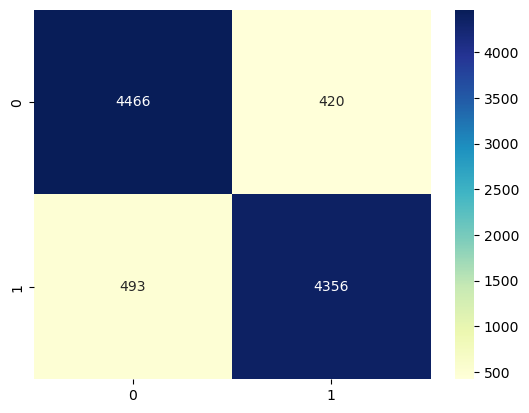

In [160]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')

### Model Tuning:

In [161]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [174]:
# Creating a list of hyper_parameters
hyper_params = {'svc__C': [1, 2],  
                'svc__kernel': ['linear', 'poly', 'rbf']
}

In [163]:
# Find the best settings.
grid = GridSearchCV(SVM, hyper_params, scoring='recall', cv=4)

# Train the grid
grid.fit(X_train, y_train)

# Check the best settings
print(grid.best_params_)

# Predict y
y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'svc__C': 2, 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4886
           1       0.91      0.90      0.91      4849

    accuracy                           0.91      9735
   macro avg       0.91      0.91      0.91      9735
weighted avg       0.91      0.91      0.91      9735



In [164]:
# Then we finally train our model with the best possible parameters
evaluation(grid.best_estimator_)

[[4467  419]
 [ 493 4356]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4886
           1       0.91      0.90      0.91      4849

    accuracy                           0.91      9735
   macro avg       0.91      0.91      0.91      9735
weighted avg       0.91      0.91      0.91      9735



Without going beyond the first findings, the Grid enables us to get excellent outcomes. To strengthen this argument, we will test additional factors in the future.

### Final Results:

Precision Recall Curve

In [165]:
# Use of the model which works well without touching the hyperparameters
model = SVM

In [166]:
# Retrieve data from variables
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

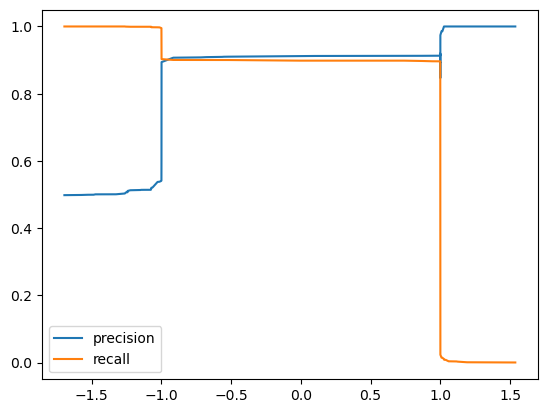

In [167]:
# Display precision and recall curves
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [168]:
# Decide on the decision point
def final_model(model, X, threshold=0):
    return model.decision_function(X) > threshold

y_pred = final_model(grid.best_estimator_, X_test, threshold=0)

In [169]:
# Check F1 score
f1_score(y_test, y_pred)

0.9052369077306732

In [171]:
# Check the recall score
recall_score(y_test, y_pred)

0.8983295524850484

### Conclusion: 

After this section is over, it can be said that the analysis, pre-processing, and transformation of the data is one of the steps that takes the most time but is essential to getting the best results. A critical skill for a skilled data scientist is the ability to comprehend and prepare them properly before beginning to create the prediction model. Knowing how to pick the classifier's parameters appropriately is also essential since making the incorrect option might materially harm the outcomes. 

In all the models, very high accuracy percentages have been attained. This is because data from already-played games as well as input qualities that are strongly related to the variable to be predicted account for this. There are other more factors to consider in a game that are not included in this "dataSet" (number of "minions", amount of gold, items purchased, ...). 

The ideal situation would be to have all of these additional features alongside the ones that are now there, but at a certain point in the game rather than as they are currently, which is data that is only accessible after the game has ended. Since it would be extremely interesting to collect a "dataSet" with the data of a team at 10, 15, and 20 minutes knowing whether he has eventually succeeded to win, for instance, as shown in the descriptive analysis section, the average length of the games is 30 minutes.